In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as pt
from scipy.optimize import curve_fit as cf

# DataSet 1


In [2]:
#import data in a numpy array
data1 = np.loadtxt('dataset1.txt')
x1 = data1[:,0]
y1 = data1[:,1]
data1

array([[0.00000000e+00, 1.60650023e+00],
       [2.50250250e-02, 4.03593098e+00],
       [5.00500501e-02, 6.90478380e+00],
       ...,
       [2.49499499e+01, 7.41839670e+01],
       [2.49749750e+01, 7.38712219e+01],
       [2.50000000e+01, 6.98274894e+01]])

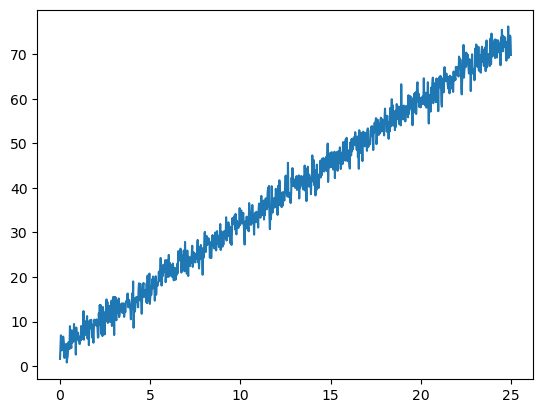

In [3]:
#Plot the raw data 
pt.plot(x1,y1)

* Seeing the raw data plot we can estimate that this data is most likely a straight line without any noise

In [4]:
#Using lstsq function to calulate for parameters
#As we are give a 2 dimenstional data we will get 2 paramerters for the linear model
M = np.column_stack([x1, np.ones(len(x1))])
(p1, p2), _, _, _ = np.linalg.lstsq(M, y1, rcond=None)

In [5]:
#The estimated equation
print(f'{p1}x + {p2}')

2.791124245414921x + 3.848800101430749


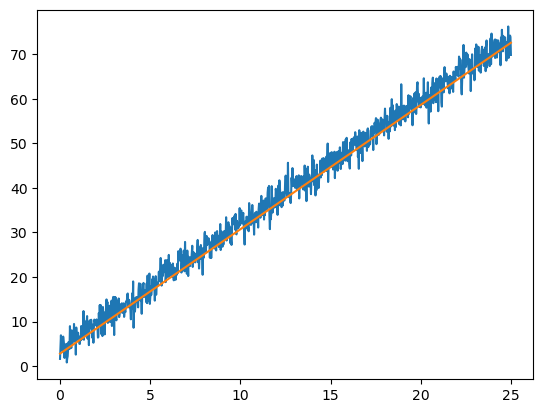

In [6]:
#For plotting the data draw the above line
def sline(x,p1,p2):
    return p1*x+p2

#Find the filtered values of y1
y_clean_1 = sline(x1,p1,p1)

#Plot the clean data with raw data
pt.plot(x1,y1,x1,y_clean_1)


In [7]:
#finding the noise
yn = y1-y_clean_1

<ErrorbarContainer object of 3 artists>

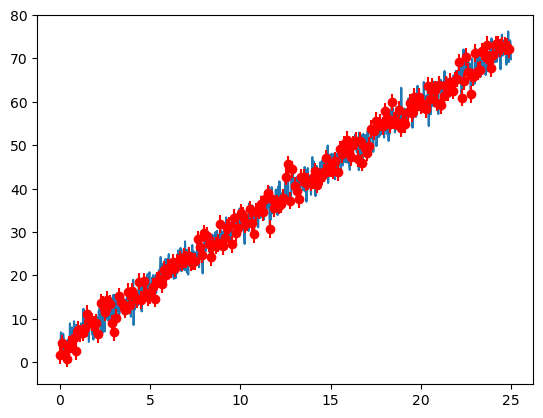

In [8]:
#plotting th error bars
pt.plot(x1,y1)
pt.errorbar(x1[::5],y1[::5],np.std(yn),fmt='ro')

In [9]:
#Using curve_fit to find the parameters
#from scipy.optimize import curve_fit as cf

(p1,p2),_ = cf(sline,x1,y1)
y_clean_2 = sline(x1,p1,p2)
print(f'{p1}x + {p2}')

2.7911242472208153x + 3.848800089588013


This curve_fit time
142 µs ± 573 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
This is lstsq time
25.4 µs ± 124 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


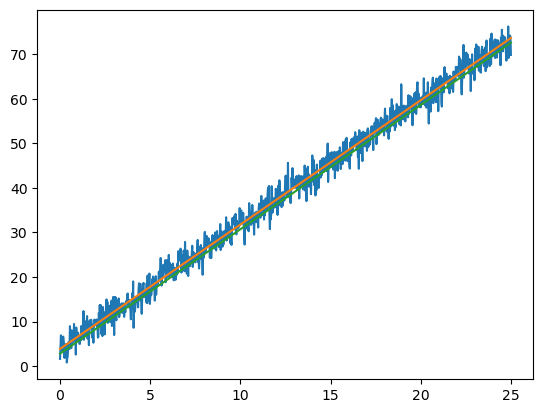

In [10]:
#Comparing curve_fit and lstsq

#Using curve_fit to find the parameters
#from scipy.optimize import curve_fit as cf

print('This curve_fit time')
%timeit cf(sline,x1,y1)

print('This is lstsq time')
%timeit np.linalg.lstsq(M, y1, rcond=None)

#Accuracy of fit
pt.plot(x1,y1,x1,y_clean_2,x1,y_clean_1)

### Observations

* We can observe that the lstsq method take a lot less time than that of curve_fit the reson being lstsq is specially desined for linear models i.e no matter what kind of data given lstsq will return parameters that solve Ax=b or is atleast close to Ax=b solutions while curve_fit uses some other algoritm that is relatively slower than matrix elemination

* We can see both methods perform nearly well, but it looks like curve_fit is more accurate than lstsq, clarly we are seeing some trade off between computational power and accuracy of the fit

# DataSet 2

In [11]:
#import data in a numpy array
data2 = np.loadtxt('dataset2.txt')
x2 = data2[:,0]
y2 = data2[:,1]
data2

array([[-3.        , -3.98145223],
       [-2.99399399, -4.33134298],
       [-2.98798799, -4.21162181],
       ...,
       [ 2.98798799,  4.78819245],
       [ 2.99399399,  4.09037566],
       [ 3.        ,  4.37954697]])

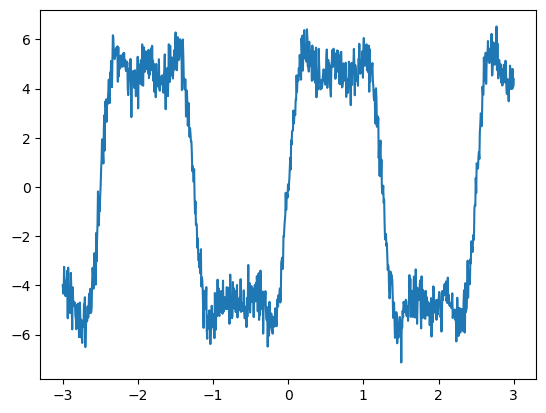

In [12]:
#Plot the raw data 
pt.plot(x2,y2)

In [13]:
# Seeing the data we can estimate that this data is made of some function which sum of sine waves and noise added to it.

#To calculate the number of sine waves that make up the function we will use fourier transform
sampling_rate = 0.01
n    = len(x2)
yf   = np.fft.rfft(y2)
xf   = np.fft.rfftfreq(n,0.01)
#pt.plot(xf,np.abs(yf))


## Theory of fourier transform
* We know that our function is made of sine waves with some additional noise in it, to filter the not only noise but also the number of sine waves fourier transfor is used
* The fourier transform of $sin(\omega t)$ is $−jπ[δ(ω−ω0)−δ(ω+ω0)]$ thus the number of high peaks in the right side of magnitude plot will be the number of frequencies,and hence number of sine waves
* Other hills are noise fequencies which can be ignored

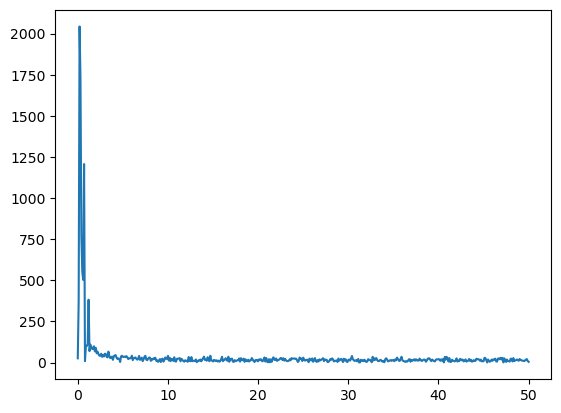

In [14]:
pt.plot(xf,np.abs(yf))

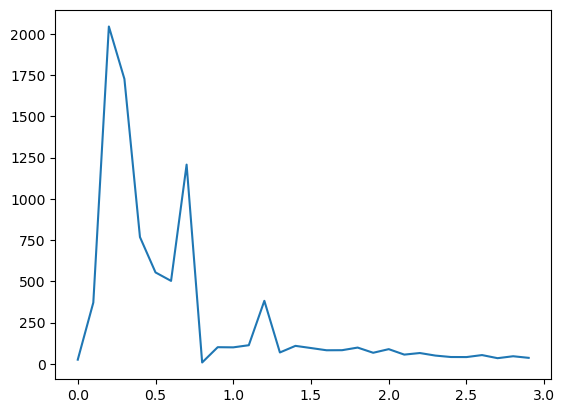

In [15]:
# Zooming the plot to get good idea of peaks
pt.plot(xf[:30],np.abs(yf)[:30])

**Hence as there are 3 sine waves as there are 3 peaks**

### Method
* The method I have chose is curve_fit oppose to lstsq because clearly the data is not in bounds of a linear mode,using lstsq will return a straight line and that would not be that beneficial, or it will try to find a solution in form of Ax=b, this may go frenzy and give the least accurate results too as the data seems to peordic, also the fact that we know how the data was generated hints us in direction to use curve_fit rather than lstsq

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


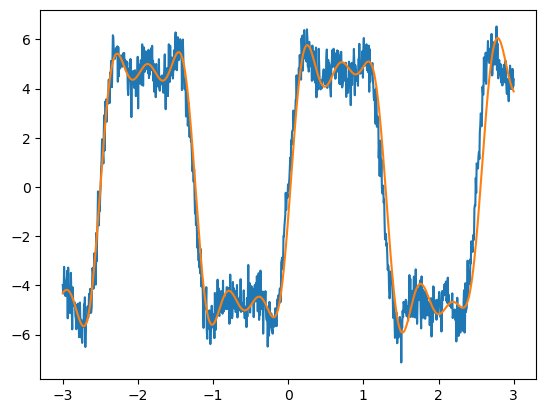

In [19]:
# Making a sine wave and addition of sine wave function
def sinfunc(x, p1, p2,f,theta):
    return p1 * np.sin(f * p2 * x + theta)

def sinex(x,p1,p2,p3,p4,p5,p6,p7,p8,p9,t1,t2,t3,f1,f2,f3):
    return sinfunc(x,p1,1,f1,t1) + sinfunc(x,p3,1,f2,t2) + sinfunc(x,p5,1,f3,t3)

# Throwing every unknow parameters in curve fit
K = 260
(sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,sp9,st1,st2,st3,sf1,sf2,sf3),_ = cf(sinex,x2[:K],y2[:K])

#filtered data
ynew = sinex(x2,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,sp9,st1,st2,st3,sf1,sf2,sf3)

#Plotting the data
pt.plot(x2,y2,x2,ynew)

In [20]:
# Finding the error bars
yn = y2-ynew

<ErrorbarContainer object of 3 artists>

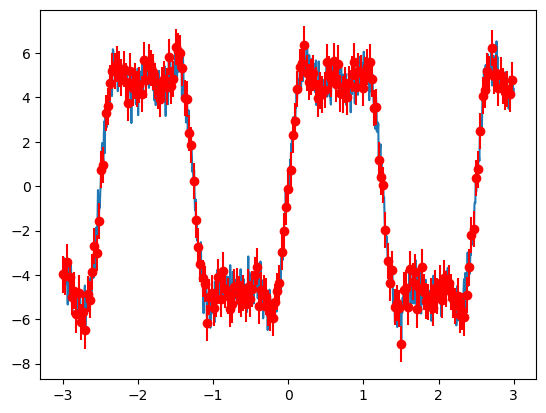

In [21]:
pt.plot(x2,y2)
pt.errorbar(x2[::5],y2[::5],np.std(yn),fmt='ro')

## Accuracy

* We can see that the our filtering method using curve_fit seems to be not performing good on examples of x beyond 1
* This seems the case of overfitting of first 270 points and thus perform rather poorly on the futher samples

* Alternative method would be to use inverse fourier transform
    * As we have already made a magnitude plot of the data we can use some code to remove frequencies below $X(j\omega)$ < 250, then throw this data in np.fft.ifft and get the filtered values of y without noise, plotting the data will result in more accurate plot, than any method as this is the most commonly praticed way to filter siginals 
    

# DataSet 3

In [22]:
#import data in a numpy array
data3 = np.loadtxt('dataset3.txt')
x3 = data3[:,0]
y3 = abs(data3[:,1])
data3

array([[ 2.00000000e+15, -1.14844543e-09],
       [ 1.99933289e+15, -8.70095067e-10],
       [ 1.99866578e+15,  3.19426233e-10],
       ...,
       [ 1.33422282e+12, -9.09643878e-10],
       [ 6.67111409e+11,  1.41260023e-09],
       [ 1.00000000e+03, -1.65757635e-09]])

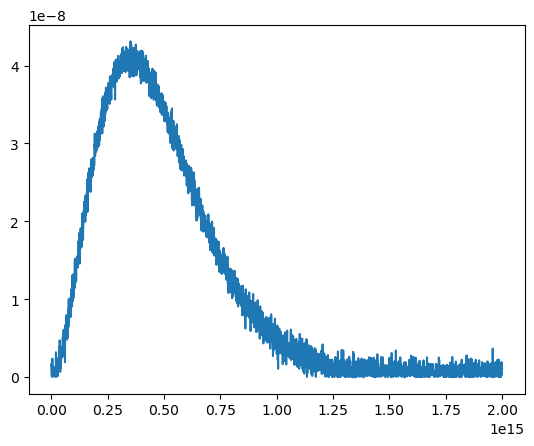

In [23]:
#Plot the raw data 
pt.plot(x3,y3)

## Method 
* This also seems to be case of curve_fit rather than lstsq, once again we know how data was generated i.e through black body radiationa and the mode is also not linear once again hence curve_fit is better choise

### Planck's law of black-body radiation

<font size=5>$B_\nu(T) = \frac{2\nu^2}{c^2}\frac{h\nu}{e^{h\nu/kT} - 1},$<font>

In [24]:
# Code for Black Body radiation

#Known constants
c = 3e8
k = 1.38e-23


def planck(v, T,h):
    a = 2.0*h*v**3
    b = h*v/(k*T)
    intensity = a/ ( (c**2) * (np.exp(b) - 1.0) )
    return intensity

Esstimated Temprature: 6002.173567461235 K
Esstimated Planck's Constant: 6.628675297626473e-34 m^2kg/s


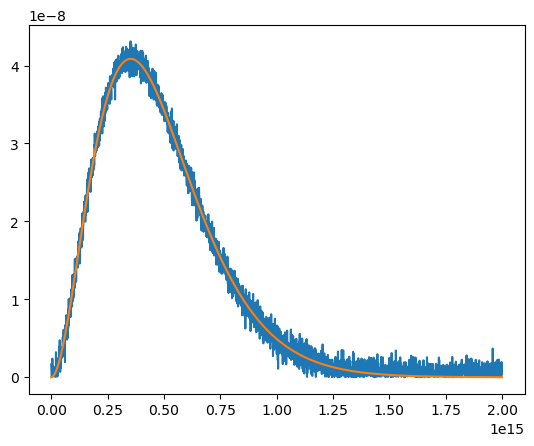

In [25]:
# Estimating parameters plack constant and temprature using curve_fit
# Documentation says that p0 specifies the intial guess, and algorithm works from ther
# The reason to use intial guess is because the inproptiate dimensions of data on x and data on y
# As ydata is really close to 0 where as xdata is really close to infinite, the best curve could be a straight line
# passing through zero which argualbly not inccorect, but notheless not very useful

(sT,sh), _ = cf(planck,x3,y3,p0=[4000,6.6e-34])

# filtered data
y_clean = planck(x3,sT,sh)
pt.plot(x3,y3)
pt.plot(x3,y_clean)

# print parameters
print(f'Esstimated Temprature: {sT} K')
print(f"Esstimated Planck's Constant: {sh} m^2kg/s")


In [26]:
# Plotting Error bars
yn = y3 - y_clean

<ErrorbarContainer object of 3 artists>

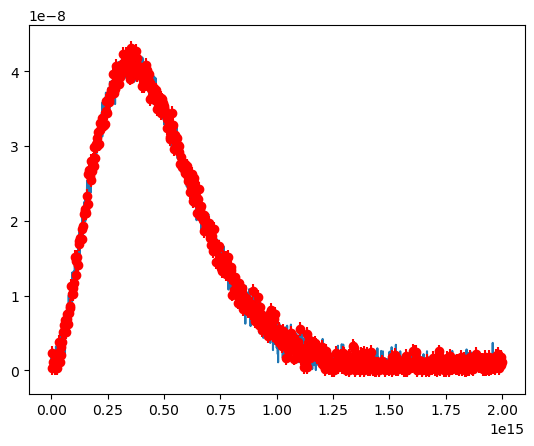

In [27]:
pt.plot(x3,y3)
pt.errorbar(x3[::5],y3[::5],np.std(yn),fmt='ro')

# DataSet 4

In [28]:
#import data in a numpy array
data4 = np.loadtxt('dataset4.txt')
x4 = data4[:,0]
y4 = data4[:,1]
data4

array([[ 0.        ,  3.03964239],
       [ 0.        ,  0.26301448],
       [ 0.        ,  0.15584395],
       ...,
       [10.        ,  1.55411664],
       [10.        ,  2.10151596],
       [10.        ,  0.78044386]])

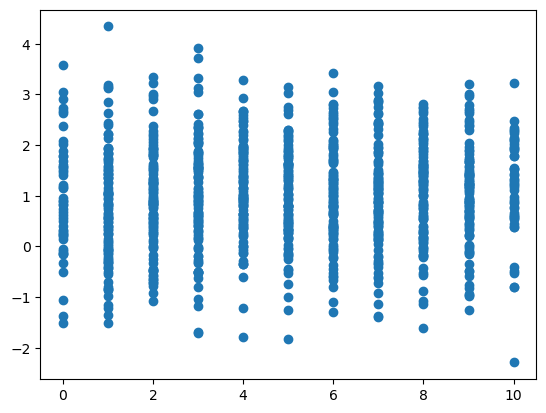

In [29]:
#Plot the raw data 
pt.plot(x4,y4,'o')

* I think of this plot as a data collected while doing a experiment, so therfore the mean of my readings will be the my output to the experiment at that input

* The below code is simpy taking mean values of ydata at x=0 to x=1 for each values of x

* Afterwards I will plot the xdata, with the mean i go from the below code and assume that there is linear relation between ymean and xdata, reason being that I dont know how was this data generated

In [30]:
x=[]
y=[]
ymean0 = np.mean(data4[:50,1])
x.append(0)
y.append(ymean0)

ymean1 = np.mean(data4[50:150,1])
x.append(1)
y.append(ymean1)


ymean2 = np.mean(data4[150:250,1])
x.append(2)
y.append(ymean2)

ymean3 = np.mean(data4[250:350,1])
x.append(3)
y.append(ymean3)

ymean4 = np.mean(data4[350:450,1])
x.append(4)
y.append(ymean4)

ymean5 = np.mean(data4[450:550,1])
x.append(5)
y.append(ymean5)

ymean6 = np.mean(data4[550:650,1])
x.append(6)
y.append(ymean6)

ymean7 = np.mean(data4[650:750,1])
x.append(7)
y.append(ymean7)

ymean8 = np.mean(data4[750:850,1])
x.append(8)
y.append(ymean8)

ymean9 = np.mean(data4[850:950,1])
x.append(9)
y.append(ymean9)

ymean10 = np.mean(data4[950:1000,1])
x.append(10)
y.append(ymean10)

x = np.array(x)
y = np.array(y)

In [31]:
#Using curve_fit to find the parameters for linear model
def sline(x,m,c):
    return m*x+c
(m,c),_ = cf(sline,x,y)
y_predict = sline(x,m,c)

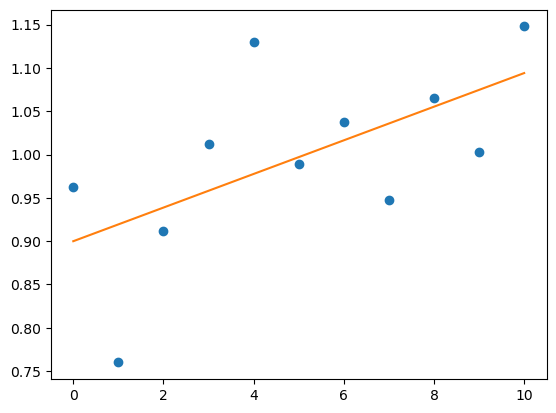

In [32]:
#Plotting the mean values of y from the above code and the predicted value of the data
pt.plot(x,y,'o')
pt.plot(x,y_predict)

**Thus I can predict the future output of my experiment using the this method with reasonable margin**